# CAPSTONE 1: GLOBAL C02 EMISSION ANALYSIS


## THREE QUESTIONS FOR CAPSTONE:  

### 1. Which region has the most emissions, and which region has the least?


### 2. Which emission types have the highest and lowest emissions levels?


### 3. Are the emission types correlated?


## About the CDIAC dataset. 

CO2 emissions are at the center of a significant global debate on the risks and validity of climate change. The data in this analysis was downloaded from the Carbon Dioxide Information Analysis Center [CDIAC](https://cdiac.ess-dive.lbl.gov/trends/emis/overview_2014.html) and is considered to be approximations that are generally accurate. In the data set there is numeric data for solid, liquid, gas, cement, and flaring emissions, including aggregated totals from as early as 1751 to 2014. For more information about collection and processing of the data, please read the about section below or visit the website.

Common issues to consider: lack of reporting, lack of standards, lack of oversight, intentionally reporting erroneous data, pollution in international territory, clandestine pollution, construction of data Regions by CDIAC, changes in nation state status like collapse of USSR, and other similar circumstances.

About    
    The 1950 to present CO2 emission estimates are derived primarily from energy statistics published by the United Nations (2017), using the methods of Marland and Rotty (1984). The energy statistics were compiled primarily from annual questionnaires distributed by the U.N. Statistical Office and supplemented by official national statistical publications. As stated in the introduction of the Statistical Yearbook, "in a few cases, official sources are supplemented by other sources and estimates, where these have been subjected to professional scrutiny and debate and are consistent with other independent sources." Data from the U.S. Department of Interior's Geological Survey (USGS 2017) were used to estimate CO2 emitted during cement production. Values for emissions from gas flaring were derived primarily from U.N. data but were supplemented with data from the U.S. Department of Energy's Energy Information Administration (1994), Rotty (1974), and data provided by G. Marland. Greater details about these methods are provided in Marland and Rotty (1984), Boden et al. (1995), and Andres et al. (1999).
    



## EXPLORE THE DATASET

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:\\Users\\DJ\\Documents\\AnacondaPython\\Thinkful\\FilesToLoadThinkful\\C02_Emissions_ALL_UTF8.csv')

In [5]:
df.shape

(1768, 9)

In [6]:
df.describe()

,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring
count,1768.000000,1.768000e+03,1.768000e+03,1768.000000,1768.000000,1768.000000,1768.000000
mean,1919.466063,2.211117e+05,1.078961e+05,73957.700792,31089.415724,6221.949095,1946.580317
std,61.953996,3.720830e+05,1.928213e+05,138920.444077,77749.189212,21821.010141,5381.827877
min,1751.000000,1.000000e+00,0.000000e+00,-105.000000,0.000000,0.000000,0.000000
25%,1880.000000,5.327750e+03,3.775000e+03,0.000000,0.000000,0.000000,0.000000
50%,1926.000000,4.887400e+04,2.820800e+04,2672.000000,7.000000,0.000000,0.000000
75%,1970.000000,2.691118e+05,1.450960e+05,88473.500000,12425.250000,5566.250000,111.250000
max,2014.000000,2.868887e+06,2.078153e+06,744101.000000,446154.000000,348176.000000,55321.000000


In [7]:
df.head()

,Region,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon)
0,Africa,1884,6,6,0,0,0,0,.
1,Africa,1885,10,10,0,0,0,0,.
2,Africa,1886,13,13,0,0,0,0,.
3,Africa,1887,13,13,0,0,0,0,.
4,Africa,1888,22,22,0,0,0,0,.


In [8]:
df.isnull().mean() # CHECK FOR NULLS, COUNTS ARE OFF

Region                                                                                     0.0
Year                                                                                       0.0
Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)    0.0
Emissions from solid fuel consumption                                                      0.0
Emissions from liquid fuel consumption                                                     0.0
Emissions from gas fuel consumption                                                        0.0
Emissions from cement production                                                           0.0
Emissions from gas flaring                                                                 0.0
Per capita CO2 emissions (metric tons of carbon)                                           0.0
dtype: float64

In [9]:
df.Region.unique() # UNIQUE REGIONS IN DATASET

array(['Africa', 'Developing America', 'Centrally Planned Asia',
       'Centrally Planned Europe', 'Far East', 'Germany', 'Middle East',
       'North America', 'Oceania', 'Western Europe'], dtype=object)

In [10]:
df.columns = ['Region', 'Year', 'Total', 'Solids', 'Liquids', 'Gases', 'Cement','Flaring', 'Total_Per_Capita'] # RENAME COLUMNS SO MORE INTUITIVE

In [11]:
df['Total_Per_Capita'] = pd.to_numeric(df.Total_Per_Capita, errors='coerce') # ADJUST NaN ISSUE WITH DATA SET

In [12]:
df_1950 = df[df.Year >= 1950] # SELECT DATA FROM 1950 TO 2014 

## EXPLAIN DATASET
- C02 emissions data for ten regions, ordered by year.
- Data set contains seven data categories for each of the ten regions:   
>  Five individual emission categories: Solids, Liquids, Gases, Cement, Flaring  
>  Two aggregated "Total" C02 measures per region: Total and Total Per Capita  
- Data for regions go back to 1751 for some, while others 1800s and 1900s.
- Per capita measures and a more centralized data collection process through the United Nations started in 1950.
- Emissions from gas flaring for some regions start after 1950, but does not impact data in this analysis.
- This report will use data from 1950 to 2014. 

## 1. Which region has the most emissions, and which region has the least?

#### To answer this question, each region's total emissions are broken out individually and placed in one chart using the .loc function.

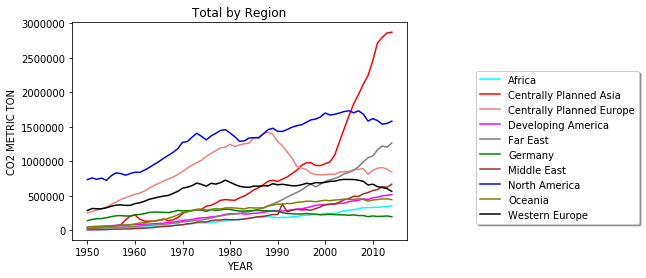

In [13]:
y = df_1950.loc[df_1950.Region=='Africa', 'Total']
y2 = df_1950.loc[df_1950.Region=='Centrally Planned Asia', 'Total']
y3 = df_1950.loc[df_1950.Region=='Centrally Planned Europe', 'Total']
y4 = df_1950.loc[df_1950.Region=='Developing America', 'Total']
y5 = df_1950.loc[df_1950.Region=='Far East', 'Total']
y6 = df_1950.loc[df_1950.Region=='Germany', 'Total']
y7 = df_1950.loc[df_1950.Region=='Middle East', 'Total']
y8 = df_1950.loc[df_1950.Region=='North America', 'Total']
y9 = df_1950.loc[df_1950.Region=='Oceania', 'Total']
y10 = df_1950.loc[df_1950.Region=='Western Europe', 'Total']
x = df_1950.loc[df_1950.Region=='Centrally Planned Asia', 'Year']
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='Africa', color='cyan')
ax.plot(x, y2, label='Centrally Planned Asia', color='red')
ax.plot(x, y3, label='Centrally Planned Europe', color='lightcoral')
ax.plot(x, y4, label='Developing America', color='magenta')
ax.plot(x, y5, label='Far East', color='grey')
ax.plot(x, y6, label='Germany', color='green')
ax.plot(x, y7, label='Middle East', color='brown')
ax.plot(x, y8, label='North America', color='blue')
ax.plot(x, y9, label='Oceania', color='olive')
ax.plot(x, y10, label='Western Europe', color='black')
plt.xlabel('YEAR')    
plt.ylabel('CO2 METRIC TON')
plt.title('Total by Region')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()


#### For clarity the largest vs smallest emission Region are graphed together on one chart

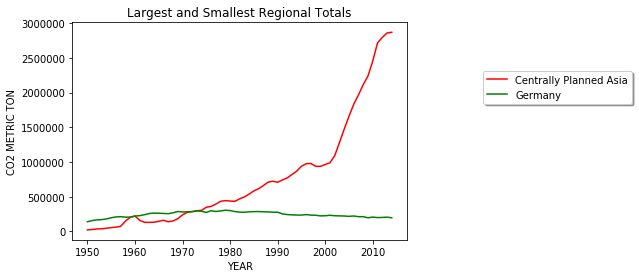

In [27]:
y = df_1950.loc[df_1950.Region=='Centrally Planned Asia', 'Total']
y2 = df_1950.loc[df_1950.Region=='Germany', 'Total']
x = df_1950.loc[df_1950.Region=='Centrally Planned Asia', 'Year']
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='Centrally Planned Asia', color='red')
ax.plot(x, y2, label='Germany', color='green')
plt.title('Highest and lowest, absolute terms')
plt.xlabel('YEAR')    
plt.ylabel('CO2 METRIC TON')
plt.title('Largest and Smallest Regional Totals')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

>  The region with the largest amount of CO2 emissions is Centrally Planned Asia, whose primary country is China. The lowest CO2 emission producing region is Germany. 

## 2. Which emission type accounts for the most emissions, and which type accounts for the least emissions?

#### To identify the amount of emissions for each category, the emissions are grouped by year and summed, then placed in a new dataframe. 

In [15]:
df_1950_agg = df_1950.groupby(['Year']).sum() # AGGREGATE REGIONAL TOTALS INTO A GLOBAL MEASURE BY YEAR

#### Utilizing a boxplot to check quality of the data and the data distribution for each emission type.

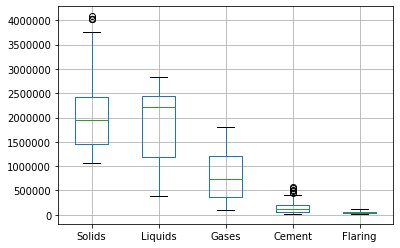

In [19]:
df_1950_agg.boxplot(column=['Solids', 'Liquids', 'Gases', 'Cement','Flaring'])

#### Charting a time-series to see the growth of each emission type over time.

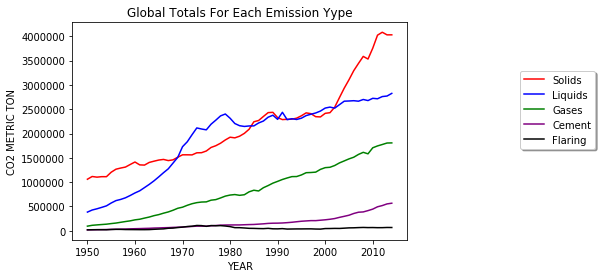

In [16]:
y = df_1950_agg['Solids']
y2 = df_1950_agg['Liquids']
y3 = df_1950_agg['Gases']
y4 = df_1950_agg['Cement']
y5 = df_1950_agg['Flaring']
x = df_1950_agg.index
fig = plt.figure()
ax = plt.subplot(111) # WHAT IS THIS SUBPLOT, THE LABEL BOX?
ax.plot(x, y, label='Solids', color='red')
ax.plot(x, y2, label='Liquids', color='blue')
ax.plot(x, y3, label='Gases', color='green')
ax.plot(x, y4, label='Cement', color='purple')
ax.plot(x, y5, label='Flaring', color='black')
plt.xlabel('YEAR')    
plt.ylabel('CO2 METRIC TON')
plt.title('Global Totals For Each Emission Yype')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

>  The largest emission type is Solids, and the lowest emission type is Flaring.

#### Exploration of global emission totals over time and global emission total per capita over time.

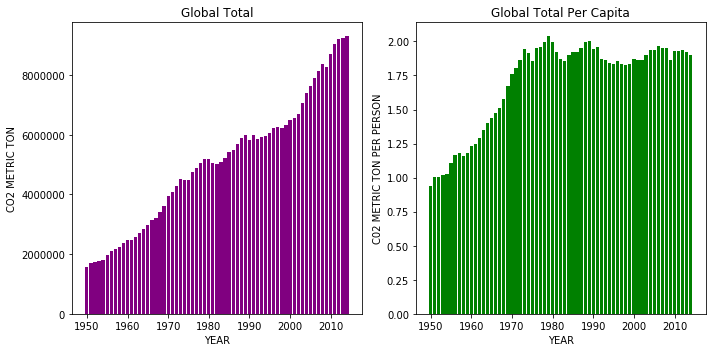

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(df_1950_agg.index, df_1950_agg['Total'], color='purple')
plt.xlabel('YEAR')
plt.ylabel('CO2 METRIC TON')
plt.title('Global Total')

plt.subplot(1, 2, 2)
plt.bar(df_1950_agg.index, (df_1950_agg['Total_Per_Capita'])/10, color='green') # DIVIDED BY 10, 10 REGIONS
plt.xlabel('YEAR')
plt.ylabel('C02 METRIC TON PER PERSON')
plt.title('Global Total Per Capita')

plt.tight_layout()
plt.show()

>  Growth in total CO2 emissions is more or less linear. Population growth, not shown here, is linear. Global Total Per Capita, despite going sideways to down since the mid 1970s, represents the potential significance of population on CO2 emissions. Population in 1975 = 4079087198. In 2014 population = 7298453033. Population hasn't quite doubled, but has increased about 79%. Yet the Global Total Per Capita has stayed roughly the same. Energy infrastructure investments, production of goods, and consumption behaviors have not changed much since 1975 when viewed on a per person basis. Said another way, population has gone up linearly, and so has total emissions of CO2. Correlation does not mean causation, but this appears to be a good area for addition research. 

## 3. Are the emission types correlated?

In [18]:
corr = df_1950_agg.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total,Solids,Liquids,Gases,Cement,Flaring,Total_Per_Capita
Total,1,0.966268,0.935024,0.98867,0.934476,0.380536,0.815911
Solids,0.966268,1,0.815556,0.965795,0.982195,0.24198,0.660363
Liquids,0.935024,0.815556,1,0.898373,0.757858,0.55246,0.959224
Gases,0.98867,0.965795,0.898373,1,0.941703,0.269607,0.749244
Cement,0.934476,0.982195,0.757858,0.941703,1,0.251577,0.580829
Flaring,0.380536,0.24198,0.55246,0.269607,0.251577,1,0.663234
Total_Per_Capita,0.815911,0.660363,0.959224,0.749244,0.580829,0.663234,1


>  When an individual emission type is highly correlated with the Total, it means that the year over year direction is similar. Since total is linear to up, a highly correlated emission type would also be linear to up. Correlations above .6 are significant, correlations greater than .9 are approaching perfect correlation. Solids, Gases, Liquids, and Cement are all highly correlated with the Total C02 emission category. Flaring has a relatively low correlation, which means that Flaring C02 emissions are more independent. The direction of change for Flaring is not similar year over year when compared to Total CO2 emissions and the other categories. The Flaring emissions are likely driven or have been impacted in isolation of the other categories. Total Per Capita is a derived category.

# CONCLUSION  
- It is likely that both population and economic growth are significant to CO2 emissions. 
- Develeped, "Old World", countries have lower emission growth rate profiles in the past 10 years.
- European countries have a low absolute value and a low emission growth rate. 
- Russia, China both appear to be growing steadily and have high absolute values, particularly China.
- The trend of all emission types, except for flaring, when looked at globally, are up as of 2014. 
- Generally speaking the emission types are highly correlated except for flaring.

# PROPOSAL FOR ADDITIONAL RESEARCH

Explore the significance of population growth and economic growth to the growth in emissions. Predict future growth of C02 emissions. 

Question 1: Is population growth a significant driver of C02 emissions?  
Question 2: Is economic growth a significant driver of CO2 emissions?  
Question 3: Are regional carbon emission footprints representative of regional growth in population and economic activity?
  
- Get population data and economic growth data. 
- Look for seasonal trends if any in the economic data. 
- Data needs to be able to be broken down into region, sector, and CO2 emission type. 
- Test for statistical significance using linear regression, f-test. 
- Build a predictive model to forecast emissions.
